In [204]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns 

In [2]:
#loading Parkinson DataFrame
park_data = pd.read_csv('parkinson_data.csv')
park_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
#looking at the shape of the dataset
park_data.shape

(195, 24)

In [4]:
#Accessing the information of the parkinson's data columns
park_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
#accessing the cloumn names
park_data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
#Accessing Statistical information
park_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### UNIVARIATE ANALYSIS

In [7]:
park_data[:42]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


From first observations looking at the status column and the name column of the data set,it appears a patient passes or fails all 6 tests to be seen as either positive or negative.No patient passed one of this tests and fail the other. 
This observation is not enough to make conclusions. We will analysize further to get more insight on the data 

### name

In [8]:
park_data.name.value_counts()[:30].sort_values()

phon_R01_S01_1    1
phon_R01_S24_4    1
phon_R01_S26_1    1
phon_R01_S27_7    1
phon_R01_S31_1    1
phon_R01_S31_2    1
phon_R01_S34_5    1
phon_R01_S34_4    1
phon_R01_S34_3    1
phon_R01_S34_2    1
phon_R01_S34_1    1
phon_R01_S33_6    1
phon_R01_S33_5    1
phon_R01_S33_4    1
phon_R01_S33_3    1
phon_R01_S33_2    1
phon_R01_S33_1    1
phon_R01_S32_6    1
phon_R01_S32_5    1
phon_R01_S32_4    1
phon_R01_S32_3    1
phon_R01_S32_2    1
phon_R01_S32_1    1
phon_R01_S31_6    1
phon_R01_S31_5    1
phon_R01_S31_4    1
phon_R01_S31_3    1
phon_R01_S35_1    1
phon_R01_S24_5    1
phon_R01_S24_6    1
Name: name, dtype: int64

It can be observed there are no dublicates in the voice recordings of people who tested for parkinson. each patient was recorded 6 times.

#### MDVP:Fo(Hz)

In [9]:
#Accessing the statistical information of the average vocal frequency
park_data['MDVP:Fo(Hz)'].describe()

count    195.000000
mean     154.228641
std       41.390065
min       88.333000
25%      117.572000
50%      148.790000
75%      182.769000
max      260.105000
Name: MDVP:Fo(Hz), dtype: float64

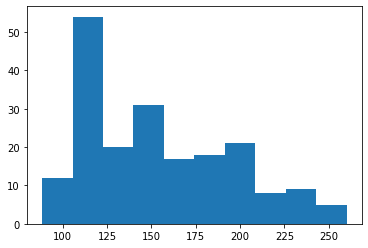

In [10]:
#Checking the distribution of the average vocal frequency
plt.hist(park_data['MDVP:Fo(Hz)'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36bf1c220>,
 'caps': [<matplotlib.lines.Line2D at 0xb36bf1c880>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36bf0bd90>],
 'medians': [<matplotlib.lines.Line2D at 0xb36bf1cfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36bf27370>],
 'means': []}

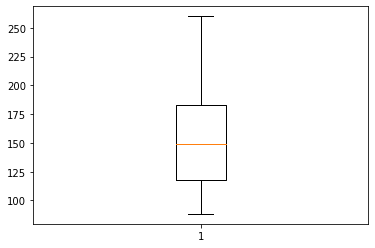

In [11]:
plt.boxplot(park_data['MDVP:Fo(Hz)'])

From the histogram and boxplot, we can observe a bit of of right skewd distribution. It appears there are no outliers. further analysis will check on outliers

In [12]:
#useful parameters
Avf_mean = 154.228641
Avf_first_quartile = 117.572000
Avf_second_quartile = 148.790000
Avf_third_quartile = 182.769000
Avf_IQR = Avf_third_quartile -Avf_first_quartile
Avf_lower_fence = Avf_first_quartile - (1.5 *Avf_IQR) #lower outlier range
Avf_upper_fence = Avf_third_quartile + (1.5 *Avf_IQR) #upper outlier range
print(Avf_lower_fence)
print(Avf_upper_fence)

19.7765
280.5645


In [13]:
#Accessing the number of average vocal frequency lower than the mean
len(park_data.loc[park_data['MDVP:Fo(Hz)'] < Avf_mean])

113

In [14]:
#Accessing the number of average vocal frequency lower than the median
len(park_data.loc[park_data['MDVP:Fo(Hz)'] < Avf_second_quartile])

97

In [15]:
#accessing the number of average vocal frequency which are outliers
len(park_data.loc[park_data['MDVP:Fo(Hz)'] > Avf_upper_fence])

0

The initial observation is confirmed.there are no outliers.97 thus 49.74% of recording is less than the median

#### NHR

In [16]:
#accessing the statistical info NHR(ratio of nocie to tonal component )
park_data['NHR'].describe()

count    195.000000
mean       0.024847
std        0.040418
min        0.000650
25%        0.005925
50%        0.011660
75%        0.025640
max        0.314820
Name: NHR, dtype: float64

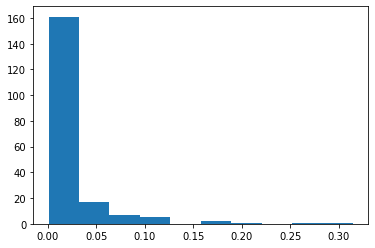

In [17]:
#plotting a histogram for NHR
plt.hist(park_data['NHR'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36c01b580>,
 'caps': [<matplotlib.lines.Line2D at 0xb36c01bca0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36c01b1f0>],
 'medians': [<matplotlib.lines.Line2D at 0xb36c025400>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36c025790>],
 'means': []}

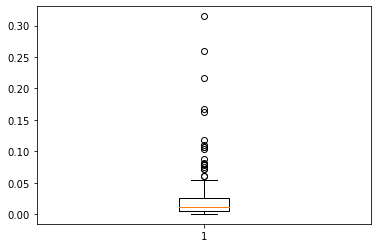

In [18]:
#plotting a boxplot for NHR
plt.boxplot(park_data['NHR'])

From both histogram and boxplot we can observe a right skewd distribution. We can see a number of outliers.we will investigate on them

In [19]:
#useful parameter
NHR_mean = 0.024847
NHR_first_quartile = 0.005925
NHR_second_quartile = 0.011660
NHR_third_qaurtile = 0.025640
NHR_IQR = NHR_third_qaurtile - NHR_first_quartile
NHR_lower_inner_fence= NHR_first_quartile - (1.5 * NHR_IQR) #lower outlier range
NHR_upper_inner_fence= NHR_third_qaurtile + (1.5 * NHR_IQR) #upper outlier range
NHR_upper_outer_fence = NHR_third_qaurtile + (3 * NHR_IQR) #extreme outliers
print(NHR_lower_inner_fence)
print(NHR_upper_inner_fence)
print(NHR_upper_outer_fence)

-0.023647500000000002
0.0552125
0.084785


In [20]:
#accessing the number of NHR recordings below the mean
len(park_data.loc[park_data['NHR'] < NHR_mean])

144

In [21]:
#accessing the number NHR recordings below the median
len(park_data.loc[park_data['NHR'] < NHR_second_quartile])

97

In [22]:
#accessing the number of NHR which are outliers/upper inner(mid-outliers)
len(park_data.loc[(park_data['NHR'] > NHR_upper_inner_fence) & (park_data['NHR']< NHR_upper_outer_fence)])

8

In [23]:
#accessing the number of NHR which have extreme outliers
len(park_data.loc[park_data['NHR'] > NHR_upper_outer_fence])

11

In [24]:
#accessing the number of NHR which are lower outliers
len(park_data.loc[park_data['NHR'] < NHR_lower_inner_fence])

0

Our initial observations have been comfirmed on the outliers. we can see that out 19 outliers, 8 were above the max whiskers point(also known as mid-outliers) and 11 were extreme outliers as the outer fence.
Again, 73.84% of the distribution were below the mean and 49.74% of the distribution made were below the median

#### HNR

In [25]:
park_data['HNR'].describe()

count    195.000000
mean      21.885974
std        4.425764
min        8.441000
25%       19.198000
50%       22.085000
75%       25.075500
max       33.047000
Name: HNR, dtype: float64

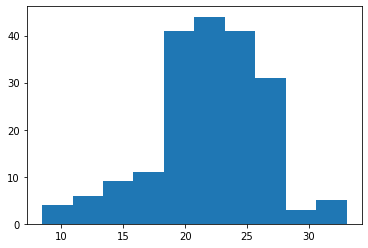

In [26]:
plt.hist(park_data['HNR'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36c1099a0>,
 'caps': [<matplotlib.lines.Line2D at 0xb36c116100>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36c109610>],
 'medians': [<matplotlib.lines.Line2D at 0xb36c116820>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36c116bb0>],
 'means': []}

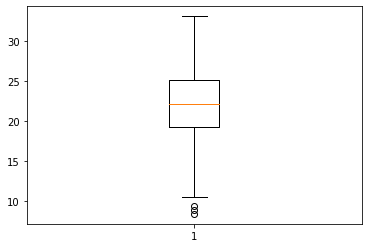

In [27]:
plt.boxplot(park_data['HNR'])

from the histogram and boxplot,we can observe a left skewd distribution. We can also observe some data points far way from the normal distribution. we will analyze for outliers

In [28]:
#useful parameters
HNR_mean =  21.885974
HNR_first_quartile = 19.198000
HNR_second_quartile = 22.085000
HNR_third_quartile = 25.075500
HNR_IQR = HNR_third_quartile - HNR_first_quartile 
HNR_lower_fence = HNR_first_quartile - (1.5*HNR_IQR)
HNR_upper_fence = HNR_third_quartile + (1.5*HNR_IQR)
print(HNR_lower_fence)
print(HNR_upper_fence)

10.381749999999998
33.89175


In [29]:
#Accessing the ratio of noise to tonal components of the recording below the mean
len(park_data.loc[park_data['HNR'] < HNR_mean])


95

In [30]:
#Accessing the ratio of noise to tonal components below the median
len(park_data.loc[park_data['HNR'] < HNR_second_quartile])


97

In [31]:
#Accessing the number of outliers in the tonal components
len(park_data.loc[park_data['HNR'] < HNR_lower_fence])


3

In [32]:
#Opening the dataset of noise to tonal components containing the outlier
park_data.loc[park_data['HNR'] < HNR_lower_fence]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


97 which made 49.74% of the ratio of noise to tonal components of the total distribution is less than the median. Again, 3 recording, thus 1.53% made the outliers. they all had a positive status

### status

In [33]:
park_data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

We can see that 147 people tested positive to parkinsons and 48 did not

### MDVP:Fhi(Hz)

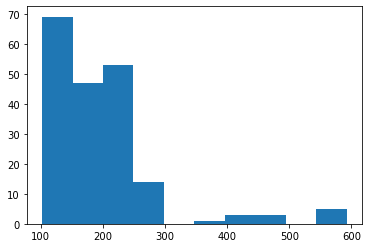

In [34]:
#checking the kind of distribution for the maximum vocal findamental frequency
plt.hist(park_data['MDVP:Fhi(Hz)']) 
plt.show()

In [35]:
park_data['MDVP:Fhi(Hz)'].describe()

count    195.000000
mean     197.104918
std       91.491548
min      102.145000
25%      134.862500
50%      175.829000
75%      224.205500
max      592.030000
Name: MDVP:Fhi(Hz), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xb36c1f7880>,
 'caps': [<matplotlib.lines.Line2D at 0xb36c1f7fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36c1f74f0>],
 'medians': [<matplotlib.lines.Line2D at 0xb36c203700>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36c203a90>],
 'means': []}

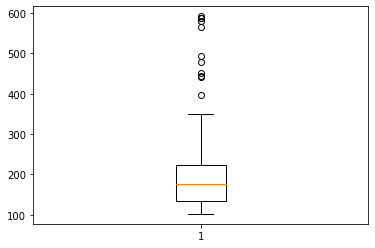

In [36]:
#Using the boxplot to access the distibution of average vocal frequency
plt.boxplot(park_data['MDVP:Fhi(Hz)'])

from the histogram and boxplot, we can observe a right skewd distribution. we can also observe a number of outliers

In [37]:
#parameters
fhi_first_quartile = 134.862500
fhi_second_quartile = 175.829000
fhi_third_quartile = 224.205500
fhi_mean = 197.104918
fhi_IQR = fhi_third_quartile - fhi_first_quartile
fhi_lower_inner_fence = fhi_first_quartile -(1.5 * fhi_IQR) #lower outlier range
fhi_upper_inner_fence = fhi_third_quartile + (1.5 *fhi_IQR)  #upper outlier range
print(fhi_lower_inner_fence)
print(fhi_upper_inner_fence)

0.8480000000000132
358.22


In [38]:
#Accessing the number of voice recording with high vocal frequency below the mean
len(park_data.loc[park_data['MDVP:Fhi(Hz)'] < fhi_mean ])

110

In [39]:
#Accessing the number of voice recordings with high vocal frequency below the median
len(park_data.loc[park_data['MDVP:Fhi(Hz)'] < fhi_second_quartile])

97

In [40]:
#Accessing the number of voice recording with high vocal frequency which are outliers
len(park_data.loc[park_data['MDVP:Fhi(Hz)'] > fhi_upper_inner_fence])

11

In [41]:
#opening the dataset of high vocal frequency recordings which are outliers
park_data.loc[park_data['MDVP:Fhi(Hz)'] > fhi_upper_inner_fence]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
73,phon_R01_S19_2,112.014,588.518,107.024,0.00533,0.00005,0.00268,0.00329,0.00805,0.02448,...,0.04120,0.00623,24.178,1,0.509127,0.789532,-5.389129,0.306636,1.928708,0.225461
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
115,phon_R01_S27_1,151.872,492.892,69.085,0.00856,0.00006,0.00404,0.00385,0.01211,0.01843,...,0.02389,0.06051,23.693,1,0.407701,0.662668,-4.673241,0.261549,2.702355,0.274407
116,phon_R01_S27_2,158.219,442.557,71.948,0.00476,0.00003,0.00214,0.00207,0.00642,0.01458,...,0.01818,0.01554,26.356,1,0.450798,0.653823,-6.051233,0.273280,2.640798,0.170106
117,phon_R01_S27_3,170.756,450.247,79.032,0.00555,0.00003,0.00244,0.00261,0.00731,0.01725,...,0.02270,0.01802,25.690,1,0.486738,0.676023,-4.597834,0.372114,2.975889,0.282780
118,phon_R01_S27_4,178.285,442.824,82.063,0.00462,0.00003,0.00157,0.00194,0.00472,0.01279,...,0.01851,0.00856,25.020,1,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972
120,phon_R01_S27_6,128.940,479.697,88.251,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,...,0.02548,0.02350,24.743,1,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
186,phon_R01_S49_4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,...,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
187,phon_R01_S49_5,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,...,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868


We can obeserve 97,which makes 49.74% of the total number of recordings with high vocal frequency(thus 195) is less than the median.11 recordings,which is 5.6% have etremely high vocal frequency than the normal distribution. 

the dataset above shows the extremely high recording. It can be observed that out the 11 recordings 8 tested positive to parkinsons with 3 testing negative. Again, 5 of the 8 recordings testing positive is from one patient.

### MDVP:Flo(Hz)

In [42]:
park_data['MDVP:Flo(Hz)'].describe()

count    195.000000
mean     116.324631
std       43.521413
min       65.476000
25%       84.291000
50%      104.315000
75%      140.018500
max      239.170000
Name: MDVP:Flo(Hz), dtype: float64

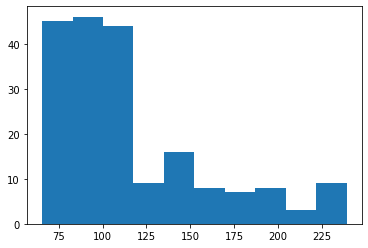

In [43]:
#checking the kind of distribution of the minimum vocal findamental frequency
plt.hist(park_data['MDVP:Flo(Hz)'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36c2d9a90>,
 'caps': [<matplotlib.lines.Line2D at 0xb36c2e71f0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36c2d9700>],
 'medians': [<matplotlib.lines.Line2D at 0xb36c2e7910>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36c2e7ca0>],
 'means': []}

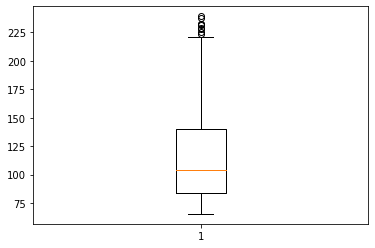

In [44]:
plt.boxplot(park_data['MDVP:Flo(Hz)'])

from the histogram and boxplot, we can see the distribution is right skewd. we can also observe most frequncy from the first and third quartiles and a few points as outliers

In [45]:
#parameters
flo_first_quartile = 84.291000
flo_second_quartile = 104.315000
flo_third_quartile = 140.018500
flo_mean = 116.324631
flo_IQR = flo_third_quartile - flo_first_quartile
flo_lower_inner_fence = flo_first_quartile -(1.5 * flo_IQR) #lower outlier range
flo_upper_inner_fence = flo_third_quartile + (1.5 *flo_IQR)  #upper outlier range
print(flo_lower_inner_fence)
print(flo_upper_inner_fence)



0.6997500000000088
223.60974999999996


from the above, the data sets below 0.6999 and above 223.609 are outliers

In [46]:
#Accessing the number of recordings with low frequency below the mean
len(park_data.loc[park_data['MDVP:Flo(Hz)'] < flo_mean])


133

In [47]:
#Accessing the number of recordings with low frequency below the median
len(park_data.loc[park_data['MDVP:Flo(Hz)'] < flo_second_quartile])

97

In [48]:
#Accessing number of low vocal frequencies which are outliers 
len(park_data.loc[park_data['MDVP:Flo(Hz)'] > flo_upper_inner_fence])

9

In [49]:
#opening the dataset
park_data.loc[park_data['MDVP:Flo(Hz)'] > flo_upper_inner_fence]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
42,phon_R01_S10_1,237.226,247.326,225.227,0.00298,0.000010,0.00169,0.00182,0.00507,0.01752,...,0.03104,0.00740,22.736,0,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
43,phon_R01_S10_2,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,...,0.03017,0.00675,23.145,0,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
44,phon_R01_S10_3,243.439,250.912,232.435,0.00210,0.000009,0.00109,0.00137,0.00327,0.01419,...,0.02330,0.00454,25.368,0,0.438296,0.635285,-7.057869,0.091608,2.330716,0.091470
45,phon_R01_S10_4,242.852,255.034,227.911,0.00225,0.000009,0.00117,0.00139,0.00350,0.01494,...,0.02542,0.00476,25.032,0,0.431285,0.638928,-6.995820,0.102083,2.365800,0.102706
46,phon_R01_S10_5,245.510,262.090,231.848,0.00235,0.000010,0.00127,0.00148,0.00380,0.01608,...,0.02719,0.00476,24.602,0,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336
63,phon_R01_S17_4,228.832,234.619,223.634,0.00296,0.000010,0.00175,0.00155,0.00526,0.01644,...,0.02647,0.00351,25.964,0,0.256570,0.683296,-7.245620,0.018689,2.498224,0.093534
166,phon_R01_S42_2,237.323,243.709,229.256,0.00303,0.000010,0.00173,0.00159,0.00519,0.01242,...,0.02089,0.00533,24.679,0,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
167,phon_R01_S42_3,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,...,0.03557,0.00910,21.083,0,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
170,phon_R01_S42_6,244.990,272.210,239.170,0.00451,0.000020,0.00279,0.00237,0.00837,0.01897,...,0.03253,0.01049,21.528,0,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220


It can be observed that the median 104.3 which made 50% or less of the recordings had low frequency vocals out of 195. thus,a slight majority of the distribution had low frequency .However 9 (i.e 1.23%) of recordings had a higher low frequency vocal. 

Again, the data set above shows the name of the 1.23% of recordings with high low frequency.We can obvserve that,out of the 9 recordings, **(1)one patient had 5 recordings having a high low freqeuncy another patient had three(3) recordings and 1 patient recording same** 

#### D2

In [50]:
#accessing the statistical data 
park_data['D2'].describe()

count    195.000000
mean       2.381826
std        0.382799
min        1.423287
25%        2.099125
50%        2.361532
75%        2.636456
max        3.671155
Name: D2, dtype: float64

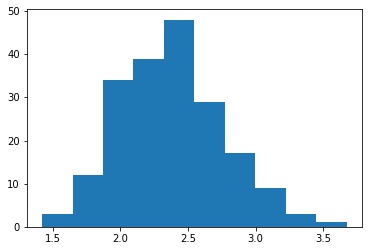

In [51]:
plt.hist(park_data['D2'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36c320550>,
 'caps': [<matplotlib.lines.Line2D at 0xb3697c6f10>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36c320730>],
 'medians': [<matplotlib.lines.Line2D at 0xb3697c61f0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb3697c6880>],
 'means': []}

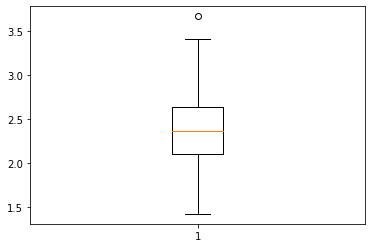

In [52]:
plt.boxplot(park_data['D2'])

In [53]:
#parameters
d2_first_quartile = 2.099125
d2_second_quartile =  2.361532
d2_third_quartile = 2.636456
d2_mean = 2.381826
d2_IQR = d2_third_quartile - d2_first_quartile
d2_lower_inner_fence = d2_first_quartile -(1.5 * d2_IQR) #lower outlier range
d2_upper_inner_fence = d2_third_quartile + (1.5 *d2_IQR)  #upper outlier range
print(d2_lower_inner_fence)
print(d2_upper_inner_fence)

1.2931285
3.4424525


In [54]:
#accessing the number dynamic complexity in the recordings which are outliers

len(park_data.loc[park_data['D2'] > d2_upper_inner_fence])

1

In [55]:
#accessing the number dynamic complexity in the recordings below the mean

len(park_data.loc[park_data['D2'] < d2_mean])

102

In [56]:
#accessing the number dynamic complexity in the recordings below the median
len(park_data.loc[park_data['D2'] < d2_second_quartile])

97

In [57]:
#accessing the dataset containing the outliers
park_data.loc[park_data['D2'] > d2_upper_inner_fence]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
89,phon_R01_S21_6,179.711,225.93,144.878,0.00709,0.00004,0.00391,0.00419,0.01172,0.04313,...,0.06892,0.07223,11.866,1,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086


From the observations, one recording was outlier. Again, 97, thus 49.74% had recordings below the median 

##### MDVP:APQ

In [58]:
#accessing stat info of MDVP:APQ
park_data['MDVP:APQ'].describe()

count    195.000000
mean       0.024081
std        0.016947
min        0.007190
25%        0.013080
50%        0.018260
75%        0.029400
max        0.137780
Name: MDVP:APQ, dtype: float64

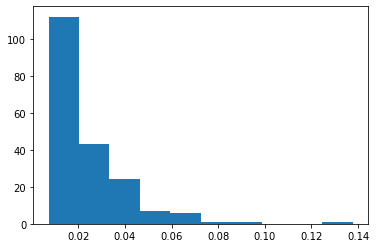

In [59]:
#plotting the histogram 
plt.hist(park_data['MDVP:APQ'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36c0a96a0>,
 'caps': [<matplotlib.lines.Line2D at 0xb36c0a1070>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36c0a9130>],
 'medians': [<matplotlib.lines.Line2D at 0xb36c0a11c0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36c0518b0>],
 'means': []}

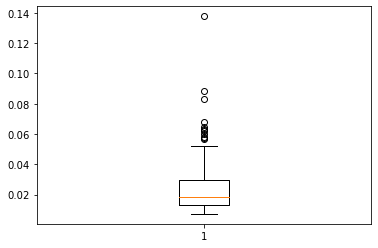

In [60]:
#plotting boxplot
plt.boxplot(park_data['MDVP:APQ'])

From the above histogram and boxplot, we can observe a right skewed distribution. we can also observe a majority of data distribution at 50% or less. there is quite a number of outliers in the distribution. we will analyze them.

In [61]:
#parameters
APQ_mean =  0.024081
APQ_first_quartile =  0.013080
APQ_second_quartile =  0.018260
APQ_third_quartile =  0.029400
APQ_IQR = APQ_third_quartile - APQ_first_quartile 
APQ_upper_inner_fence = APQ_third_quartile + (1.5 * APQ_IQR) #upper outier
APQ_lower_inner_fence = APQ_first_quartile - (1.5 * APQ_IQR) #lower outlier 
APQ_upper_outer_fence = APQ_third_quartile + (3 * APQ_IQR) #extreme outlier
print(APQ_lower_inner_fence)
print(APQ_upper_inner_fence)
print(APQ_upper_outer_fence)

-0.011400000000000002
0.05388
0.07836


In [62]:
#accessing the number of APQ(variation in amplitude) below the mean
len(park_data.loc[park_data['MDVP:APQ'] < APQ_mean])

126

In [63]:
#accessing the number of APQ below the median
len(park_data.loc[park_data['MDVP:APQ'] < APQ_second_quartile])

97

In [64]:
#accessing the number of APQ which are mid outliers(beyond the max point only)
len(park_data.loc[(park_data['MDVP:APQ'] > APQ_upper_inner_fence) & (park_data['MDVP:APQ'] < APQ_upper_outer_fence)])

9

In [65]:
#accessing the number of APQ which are extreme outliers
len(park_data.loc[park_data['MDVP:APQ'] > APQ_upper_outer_fence])

3

126 recordings thus 64.61%  are below the mean. 49.74% of the data recordings are below the median. On outliers, 9 recordings were slightly above the maximum point of the distribution and 3 recordings were widely apart from the data distributions

#### Jitter:DDP 

In [66]:
#acessing the statistical info
park_data['Jitter:DDP'].describe()


count    195.000000
mean       0.009920
std        0.008903
min        0.002040
25%        0.004985
50%        0.007490
75%        0.011505
max        0.064330
Name: Jitter:DDP, dtype: float64

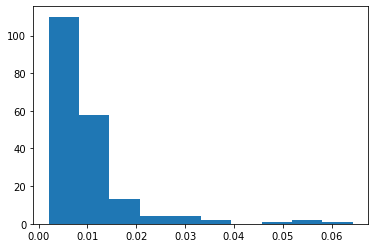

In [67]:
#plotting histogram
plt.hist(park_data['Jitter:DDP'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36c323dc0>,
 'caps': [<matplotlib.lines.Line2D at 0xb36c3232b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36c323790>],
 'medians': [<matplotlib.lines.Line2D at 0xb36c23b310>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36c23b3a0>],
 'means': []}

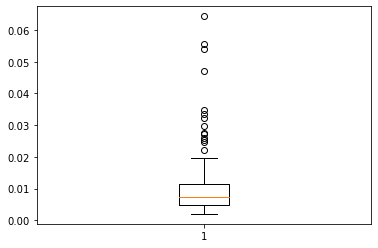

In [68]:
#plotting boxplot
plt.boxplot(park_data['Jitter:DDP'])

We can observe a right skewed distribution. There appears to be outliers in the distribution.we will analyze further

In [248]:
#parameters
DDP_mean = 0.009920
DDP_first_quartile = 0.004985
DDP_second_quartile = 0.007490
DDP_third_quartile = 0.011505
DDP_IQR = DDP_third_quartile - DDP_first_quartile
DDP_upper_inner_fence = DDP_third_quartile + (1.5 * DDP_IQR)
DDP_lower_inner_fence = DDP_first_quartile - (1.5 * DDP_IQR)
DDP_upper_outer_fence = DDP_third_quartile + (3 * DDP_IQR)
print(DDP_upper_inner_fence)
print(DDP_lower_inner_fence)
print(DDP_upper_outer_fence)

0.021285
-0.004795000000000001
0.031065000000000002


In [70]:
#accessing the number of DDP below the mean
len(park_data.loc[park_data['Jitter:DDP'] < DDP_mean])

128

In [71]:
#accessing the nmuber of DDP below the median
len(park_data.loc[park_data['Jitter:DDP'] < DDP_second_quartile])

97

In [72]:
#accessing the number of DDP which are mid-outliers
len(park_data.loc[(park_data['Jitter:DDP'] > DDP_upper_inner_fence) & (park_data['Jitter:DDP'] < DDP_upper_outer_fence)])

7

In [73]:
#accessing the dataset of midoutliers
park_data.loc[(park_data['Jitter:DDP'] > DDP_upper_inner_fence) & (park_data['Jitter:DDP'] < DDP_upper_outer_fence)]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
97,phon_R01_S24_1,125.036,143.946,116.187,0.01280,0.00010,0.00743,0.00623,0.02228,0.03886,...,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
98,phon_R01_S24_2,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,...,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
101,phon_R01_S24_5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
147,phon_R01_S35_2,183.520,216.814,161.340,0.01466,0.00008,0.00849,0.00819,0.02546,0.06050,...,0.08595,0.06057,14.367,1,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
148,phon_R01_S35_3,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173


In [74]:
#accessing the number of DDP which are extreme outliers
len(park_data.loc[park_data['Jitter:DDP'] > DDP_upper_outer_fence])

7

In [75]:
#accessing the dataset of extreme outliers
park_data.loc[park_data['Jitter:DDP'] > DDP_upper_outer_fence]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
150,phon_R01_S35_5,186.695,211.961,149.442,0.01872,0.00010,0.01075,0.01154,0.03225,0.05830,...,0.08096,0.10952,12.529,1,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
157,phon_R01_S37_5,117.963,134.209,100.757,0.01813,0.00015,0.01117,0.00718,0.03351,0.04912,...,0.07830,0.10748,19.075,1,0.630547,0.646786,-3.444478,0.303214,2.964568,0.261305


128 thus(65.64%) of the data has recordings below the mean. We observe a total of 14 outliers (thus 7.17% of the data) out of which 2 patients(phon_R01_S35 and phon_R01_S24) recorded most extreme and mid outliers respectivefully. 

#### MDVP:PPQ

In [76]:
#accessing the statistical info
park_data['MDVP:PPQ'].describe()

count    195.000000
mean       0.003446
std        0.002759
min        0.000920
25%        0.001860
50%        0.002690
75%        0.003955
max        0.019580
Name: MDVP:PPQ, dtype: float64

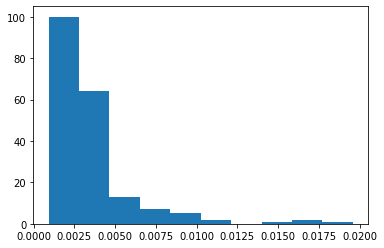

In [77]:
#plotting the histogram
plt.hist(park_data['MDVP:PPQ'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb369839f70>,
 'caps': [<matplotlib.lines.Line2D at 0xb3698456d0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb369839be0>],
 'medians': [<matplotlib.lines.Line2D at 0xb369845df0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb3698521c0>],
 'means': []}

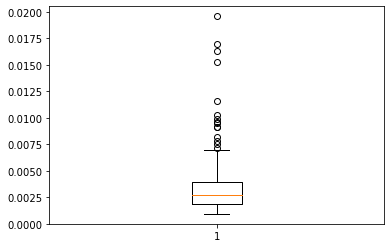

In [78]:
#plotting boxplot
plt.boxplot(park_data['MDVP:PPQ'])

From both distributions we can observe a right skewed data. We can identify some outliers

In [250]:
#parameters
PPQ_mean =  0.003446
PPQ_first_quartile = 0.001860
PPQ_second_quartile = 0.002690
PPQ_third_quartile = 0.003955
PPQ_IQR = PPQ_third_quartile - PPQ_first_quartile
PPQ_outlier = PPQ_third_quartile + (1.5 * PPQ_IQR) #outlier range
PPQ_lower_inner_fence = PPQ_first_quartile - (1.5 * PPQ_IQR)
print(PPQ_outlier)
print(PPQ_lower_inner_fence)

0.0070975000000000005
-0.0012825000000000002


In [80]:
#accessing the number of PPQ below the mean
len(park_data.loc[park_data['MDVP:PPQ'] < PPQ_mean])

134

In [81]:
#accessing the number of PPQ below the median
len(park_data.loc[park_data['MDVP:PPQ'] < PPQ_second_quartile])

97

In [82]:
#accessing the number of PPQ which are outliers
len(park_data.loc[park_data['MDVP:PPQ'] > PPQ_outlier])

15

In [83]:
#accessing the dataset of outliers
park_data.loc[park_data['MDVP:PPQ'] > PPQ_outlier]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
101,phon_R01_S24_5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
147,phon_R01_S35_2,183.520,216.814,161.340,0.01466,0.00008,0.00849,0.00819,0.02546,0.06050,...,0.08595,0.06057,14.367,1,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
148,phon_R01_S35_3,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646


134 thus 68.71% of the ditribution is below the mean. Additionally, we see 15 outliers making up 7.69% of the entire dataset.out of which a patient (phon_R01_S35) had 7 its recording as most outlier and a patient(phon_R01_S24) recording 4 outliers. All outliers have a positive status

#### MDVP:RAP

In [84]:
# accessing the statistical info
park_data['MDVP:RAP'].describe()

count    195.000000
mean       0.003306
std        0.002968
min        0.000680
25%        0.001660
50%        0.002500
75%        0.003835
max        0.021440
Name: MDVP:RAP, dtype: float64

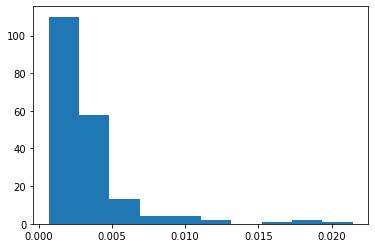

In [85]:
#plotting a histogram for MDVP:RAP
plt.hist(park_data['MDVP:RAP'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36994ae50>,
 'caps': [<matplotlib.lines.Line2D at 0xb3699595e0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36994aac0>],
 'medians': [<matplotlib.lines.Line2D at 0xb369959d00>],
 'fliers': [<matplotlib.lines.Line2D at 0xb3699660d0>],
 'means': []}

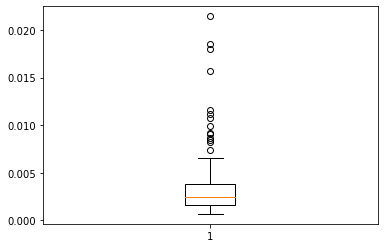

In [86]:
#plotting boxplot
plt.boxplot(park_data['MDVP:RAP'])

From both distributions we can observe a right skewed distribution. Again, we identify quite a number of outliers. We will analyze further into the data

In [253]:
#parameters
RAP_mean = 0.003306
RAP_first_quartile =  0.001660
RAP_second_quartile = 0.002500
RAP_third_quartile = 0.003835
RAP_IQR = RAP_third_quartile - RAP_first_quartile
RAP_outlier = RAP_third_quartile + (1.5 * RAP_IQR) #outlier range
RAP_lower_inner_fence = RAP_first_quartile - (1.5 * RAP_IQR)
print(RAP_outlier)
print(RAP_lower_inner_fence)

0.0070975
-0.0016024999999999998


In [88]:
#accessing the number of MDVP:RAP below the mean
len(park_data.loc[park_data['MDVP:RAP'] < RAP_mean])

128

In [89]:
#accessing the number of MDVP:RAP below the median
len(park_data.loc[park_data['MDVP:RAP'] < RAP_second_quartile])

97

In [90]:
#accessing the number of MDVP:RAP which are outliers
len(park_data.loc[park_data['MDVP:RAP'] > RAP_outlier])

14

In [91]:
#accessing the dataset of MDVP:RAP outliers
park_data.loc[park_data['MDVP:RAP'] > RAP_outlier]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
97,phon_R01_S24_1,125.036,143.946,116.187,0.01280,0.00010,0.00743,0.00623,0.02228,0.03886,...,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
98,phon_R01_S24_2,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,...,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
101,phon_R01_S24_5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
147,phon_R01_S35_2,183.520,216.814,161.340,0.01466,0.00008,0.00849,0.00819,0.02546,0.06050,...,0.08595,0.06057,14.367,1,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
148,phon_R01_S35_3,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173


128 which makes 65.64% of the entire dataset has recordings below the mean. Additionally, 14 outliers which makes 7.17% can also be observed out of which a patient (phon_R01_S35) had the most of 7 outliers and patient(phon_R01_S24) having 6 outliers

#### MDVP:Jitter(Abs)

In [92]:
#statistical info
park_data['MDVP:Jitter(Abs)'].describe()

count    195.000000
mean       0.000044
std        0.000035
min        0.000007
25%        0.000020
50%        0.000030
75%        0.000060
max        0.000260
Name: MDVP:Jitter(Abs), dtype: float64

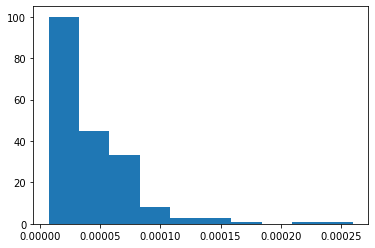

In [93]:
#plotting a histogram for MDVP:Jitter(Abs)
plt.hist(park_data['MDVP:Jitter(Abs)'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36d3ca550>,
 'caps': [<matplotlib.lines.Line2D at 0xb36d3cac70>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36d3ca1c0>],
 'medians': [<matplotlib.lines.Line2D at 0xb36d3d43d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36d3d4760>],
 'means': []}

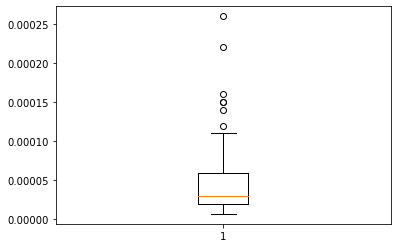

In [94]:
#plotting a boxplot for MDVP:Jitter(Abs)
plt.boxplot(park_data['MDVP:Jitter(Abs)'])

The two representations shows a right skewed distribution.Also, we can identify some outliers

In [255]:
#parameters
Abs_mean = 0.000044
Abs_first_quartile = 0.000020
Abs_second_quartile = 0.000030
Abs_third_quartile = 0.000060
Abs_IQR = Abs_third_quartile - Abs_first_quartile
Abs_outlier = Abs_third_quartile + (1.5 * Abs_IQR) #outlier upper range
Abs_lower_outlier = Abs_first_quartile - (1.5 * Abs_IQR)
print(Abs_outlier)
print(Abs_lower_outlier)

0.00011999999999999999
-3.9999999999999996e-05


In [96]:
#accessing the number of MDVP:Jitter(Abs) below the mean
len(park_data.loc[park_data['MDVP:Jitter(Abs)'] < Abs_mean])

128

In [97]:
#accessing the number of MDVP:Jitter(Abs) below the median
len(park_data.loc[park_data['MDVP:Jitter(Abs)'] < Abs_second_quartile])

54

In [98]:
#accessing the number of MDVP:Jitter(Abs) which are outliers
len(park_data.loc[park_data['MDVP:Jitter(Abs)'] > Abs_outlier])

7

In [99]:
#accessing the dataset of MDVP:Jitter(Abs) outliers
park_data.loc[park_data['MDVP:Jitter(Abs)'] > Abs_outlier]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
101,phon_R01_S24_5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
157,phon_R01_S37_5,117.963,134.209,100.757,0.01813,0.00015,0.01117,0.00718,0.03351,0.04912,...,0.07830,0.10748,19.075,1,0.630547,0.646786,-3.444478,0.303214,2.964568,0.261305


128 which makes 65.64% of the entire dataset has recordings below the mean. 54 thus 27.69% of the data is below the median. 
7 outliers are observed with all having a positive status 

#### MDVP:Jitter(%)

In [100]:
#statistical info
park_data['MDVP:Jitter(%)'].describe()

count    195.000000
mean       0.006220
std        0.004848
min        0.001680
25%        0.003460
50%        0.004940
75%        0.007365
max        0.033160
Name: MDVP:Jitter(%), dtype: float64

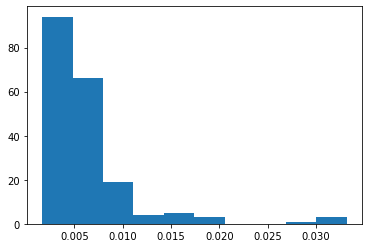

In [101]:
#plotting a histogram of MDVP:Jitter(%)
plt.hist(park_data['MDVP:Jitter(%)'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36d420fa0>,
 'caps': [<matplotlib.lines.Line2D at 0xb36d4202b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36d420c70>],
 'medians': [<matplotlib.lines.Line2D at 0xb36d417a60>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36d417f70>],
 'means': []}

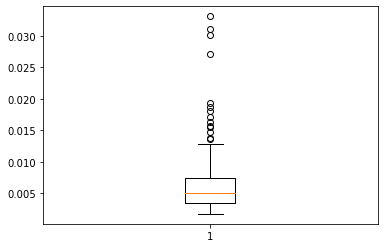

In [102]:
#plottinga a boxplot
plt.boxplot(park_data['MDVP:Jitter(%)'])

From both distributions we see a right skewed data. we can also observe a number of outliers.we will look into

In [257]:
#parameters
Jit_mean = 0.006220
Jit_first_quartile = 0.003460
Jit_second_quartile = 0.004940
Jit_third_quartile = 0.007365
Jit_IQR = Jit_third_quartile - Jit_first_quartile 
Jit_outlier = Jit_third_quartile + (1.5 * Jit_IQR)
Jit_lower_outlier = Jit_first_quartile - (1.5 * Jit_IQR)
print(Jit_outlier)
print(Jit_lower_outlier)

0.0132225
-0.0023975


In [104]:
#accessing the number of MDVP:Jitter(%) below the mean
len(park_data.loc[park_data['MDVP:Jitter(%)'] < Jit_mean])

131

In [105]:
#accessing the number of MDVP:Jitter(%) below the median
len(park_data.loc[park_data['MDVP:Jitter(%)'] < Jit_second_quartile])

96

In [106]:
#accessing the number of MDVP:Jitter(%) which are outlier
len(park_data.loc[park_data['MDVP:Jitter(%)'] > Jit_outlier])

14

In [107]:
#accessing the dataset of MDVP:Jitter(%) outliers
park_data.loc[park_data['MDVP:Jitter(%)'] > Jit_outlier]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
98,phon_R01_S24_2,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,...,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
101,phon_R01_S24_5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
147,phon_R01_S35_2,183.520,216.814,161.340,0.01466,0.00008,0.00849,0.00819,0.02546,0.06050,...,0.08595,0.06057,14.367,1,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
148,phon_R01_S35_3,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
150,phon_R01_S35_5,186.695,211.961,149.442,0.01872,0.00010,0.01075,0.01154,0.03225,0.05830,...,0.08096,0.10952,12.529,1,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487


131 thus 67.17% of the data has recordings below the mean. Again, 96 thus 49.23% of the dataset makes up recordings below the median. We observe 14 outliers which makes up 7.17% of the data. only 1 recordings of the 14 outliers have a status of 0(negative). patient(phon_R01_S35) had most outliers of 7 recordings and patient(phon_R01_S24) had 5 recordings

#### Shimmer:APQ5

In [108]:
#accessing the statistical info
park_data['Shimmer:APQ5'].describe()

count    195.000000
mean       0.017878
std        0.012024
min        0.005700
25%        0.009580
50%        0.013470
75%        0.022380
max        0.079400
Name: Shimmer:APQ5, dtype: float64

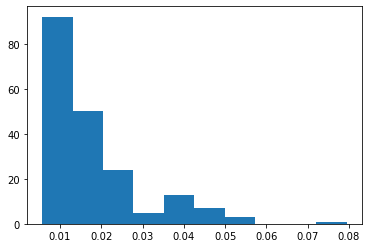

In [109]:
#plotting the histogram
plt.hist(park_data['Shimmer:APQ5'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36bf96fd0>,
 'caps': [<matplotlib.lines.Line2D at 0xb36c16bb80>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36bf96610>],
 'medians': [<matplotlib.lines.Line2D at 0xb36c16bd00>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36c16b370>],
 'means': []}

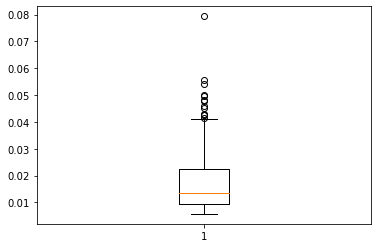

In [110]:
#plotting the boxplot
plt.boxplot(park_data['Shimmer:APQ5'])

From the histogram and boxplot, we observe a right skewed distribution. we can see some outliers in the distribution

In [111]:
#parameters
APQ5_mean = 0.017878
APQ5_first_quartile = 0.009580
APQ5_second_quartile = 0.013470
APQ5_third_quartile =  0.022380
APQ5_IQR = APQ5_third_quartile - APQ5_first_quartile
APQ5_lower_inner_fence = APQ5_first_quartile - (1.5 * APQ5_IQR)
APQ5_upper_inner_fence = APQ5_third_quartile + (1.5 * APQ5_IQR)
APQ5_upper_outer_fence = APQ5_third_quartile + (3 * APQ5_IQR)
print(APQ5_lower_inner_fence)
print(APQ5_upper_inner_fence)
print(APQ5_upper_outer_fence)

-0.009620000000000002
0.041580000000000006
0.06078


In [112]:
#accessing the number of shimmer:APQ5 below the mean
len(park_data.loc[park_data['Shimmer:APQ5'] < APQ5_mean])

125

In [113]:
#accessing the number of Shimmer:APQ5 below the median
len(park_data.loc[park_data['Shimmer:APQ5'] < APQ5_second_quartile])

97

In [114]:
#accessing the number of Shimmer:APQ5 which are mid outliers( above the max point only)
len(park_data.loc[(park_data['Shimmer:APQ5'] > APQ5_upper_inner_fence) & (park_data['Shimmer:APQ5'] < APQ5_upper_outer_fence)])

12

In [115]:
#accessing the number of Shimmer:APQ5 which are extreme outliers
len(park_data.loc[park_data['Shimmer:APQ5'] > APQ5_upper_outer_fence])

1

13 thus 6.66% outliers were observed in the dataset. 12 of which were above the max point of distribution and 1 being an extreme outlier. Again, 97, 49.74% were below the median and 125( 64.10%) were below the mean

#### Shimmer:APQ3

In [116]:
#statistical info 
park_data['Shimmer:APQ3'].describe()

count    195.000000
mean       0.015664
std        0.010153
min        0.004550
25%        0.008245
50%        0.012790
75%        0.020265
max        0.056470
Name: Shimmer:APQ3, dtype: float64

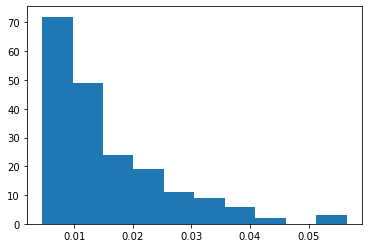

In [117]:
#plotting histogram
plt.hist(park_data['Shimmer:APQ3'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36c170280>,
 'caps': [<matplotlib.lines.Line2D at 0xb36c1b3b80>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36c170ac0>],
 'medians': [<matplotlib.lines.Line2D at 0xb36c1b3880>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36c282d90>],
 'means': []}

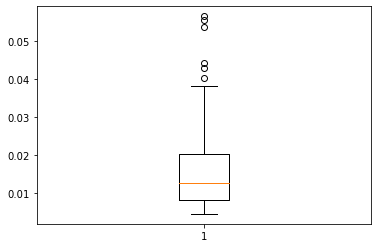

In [118]:
#plotting boxplot
plt.boxplot(park_data['Shimmer:APQ3'])

From both distribution, we see a right skewed data. We can also see outliers from the boxplot

In [259]:
#parameters
APQ3_mean = 0.015664
APQ3_first_quartile = 0.008245
APQ3_second_quartile = 0.012790
APQ3_third_quartile = 0.020265
APQ3_IQR = APQ3_third_quartile - APQ3_first_quartile
APQ3_upper_inner_fence = APQ3_third_quartile + (1.5 * APQ3_IQR)
APQ3_lower_inner_fence = APQ3_first_quartile - (1.5 * APQ3_IQR)
APQ3_upper_outer_fence = APQ3_third_quartile + (3 * APQ3_IQR)
print(APQ3_upper_inner_fence)
print(APQ3_lower_inner_fence)
print(APQ3_upper_outer_fence)

0.038294999999999996
-0.009784999999999997
0.05632499999999999


In [120]:
#accessing the number of shimmer:APQ3 below the mean
len(park_data.loc[park_data['Shimmer:APQ3'] < APQ3_mean])

124

In [121]:
#accessing the number of shimmer:APQ3 below the median
len(park_data.loc[park_data['Shimmer:APQ3'] < APQ3_second_quartile])

97

In [122]:
#accessing the number of shimmer:APQ3 which are midoutliers
len(park_data.loc[(park_data['Shimmer:APQ3'] > APQ3_upper_inner_fence) & (park_data['Shimmer:APQ3'] < APQ3_upper_outer_fence)])

5

In [123]:
#accessing the number of shimmer:APQ3 which are extreme outliers
len(park_data.loc[park_data['Shimmer:APQ3'] > APQ3_upper_outer_fence])

1

From the observations, 6 recordings were outliers of which 5 were  mid outliers and 1 extreme outlier. Again, 97, thus 49.74% had recordings below the median. 124(63.58%) recordings were below the mean

#### MDVP:Shimmer(dB)

In [124]:
#statistical info
park_data['MDVP:Shimmer(dB)'].describe()

count    195.000000
mean       0.282251
std        0.194877
min        0.085000
25%        0.148500
50%        0.221000
75%        0.350000
max        1.302000
Name: MDVP:Shimmer(dB), dtype: float64

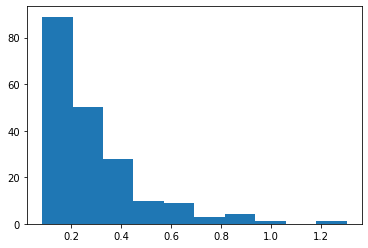

In [125]:
#plotting histogram
plt.hist(park_data['MDVP:Shimmer(dB)'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36d492880>,
 'caps': [<matplotlib.lines.Line2D at 0xb36d492fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36d4924f0>],
 'medians': [<matplotlib.lines.Line2D at 0xb36d49f700>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36d49fa90>],
 'means': []}

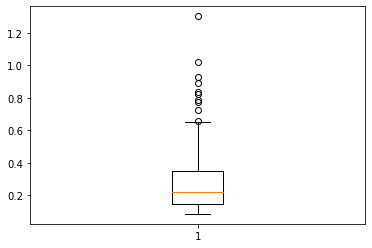

In [126]:
#plotting boxplot
plt.boxplot(park_data['MDVP:Shimmer(dB)'])

 From both distributions, we can see a right skewed data. we can also observe some outliers in the data

In [261]:
#parameters
db_mean = 0.282251
db_first_quartile = 0.148500
db_second_quartile = 0.221000
db_third_quartile = 0.350000
db_IQR = db_third_quartile - db_first_quartile
db_upper_inner_fence = db_third_quartile + (1.5 * db_IQR) #upper outlier
db_lower_inner_fence = db_first_quartile - (1.5 * db_IQR)
db_upper_outer_fence = db_third_quartile + (3 * db_IQR)   #extrem outlier
print(db_upper_inner_fence)
print(db_lower_inner_fence)
print(db_upper_outer_fence)

0.65225
-0.15374999999999997
0.9544999999999999


In [128]:
#accessing the number of MDVP:Shimmer(dB) less than the mean
len(park_data.loc[park_data['MDVP:Shimmer(dB)'] < db_mean])

128

In [129]:
#accessing the number of MDVP:Shimmer(dB) less than the median
len(park_data.loc[park_data['MDVP:Shimmer(dB)'] < db_second_quartile])

97

In [130]:
#accessing the number of MDVP:Shimmer(dB) which are mid-outliers (at the max point of the whiskers)
len(park_data.loc[(park_data['MDVP:Shimmer(dB)'] > db_upper_inner_fence) & (park_data['MDVP:Shimmer(dB)'] < db_upper_outer_fence)])

8

In [131]:
#accessing the dataset of midoutliers
park_data.loc[(park_data['MDVP:Shimmer(dB)'] > db_upper_inner_fence) & (park_data['MDVP:Shimmer(dB)'] < db_upper_outer_fence)]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
91,phon_R01_S22_1,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.07959,...,0.13262,0.01658,19.664,1,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
148,phon_R01_S35_3,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
150,phon_R01_S35_5,186.695,211.961,149.442,0.01872,0.00010,0.01075,0.01154,0.03225,0.05830,...,0.08096,0.10952,12.529,1,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487


In [132]:
#accessing the number of MDVP:Shimmer(dB) which  are extreme outliers 
len(park_data.loc[park_data['MDVP:Shimmer(dB)'] > db_upper_outer_fence])

2

In [133]:
#accessing the dataset of extreme outliers
park_data.loc[park_data['MDVP:Shimmer(dB)'] > db_upper_outer_fence]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


There are 10 (5.12%)outliers in the distributions of which 8 are at the max point of the distribution where 4 recordings are from one patient, 3 recordings from another patient and the remaining 1 to a patient. Additionally, 2 extreme outliers recorded from a one patient.
Again, we can observe one patient(phon_R01_S35) having all 6 recordings on 'MDVP:Shimmer(dB)' as outliers .

128 recordings (65.64%) were below the mean

#### MDVP:Shimmer

In [134]:
#aceesing the statistical info 
park_data['MDVP:Shimmer'].describe()

count    195.000000
mean       0.029709
std        0.018857
min        0.009540
25%        0.016505
50%        0.022970
75%        0.037885
max        0.119080
Name: MDVP:Shimmer, dtype: float64

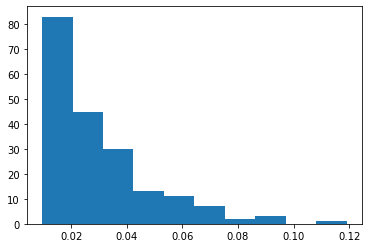

In [135]:
#plotting a histogram
plt.hist(park_data['MDVP:Shimmer'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36d57caf0>,
 'caps': [<matplotlib.lines.Line2D at 0xb36d588280>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36d57c760>],
 'medians': [<matplotlib.lines.Line2D at 0xb36d5889a0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36d588d30>],
 'means': []}

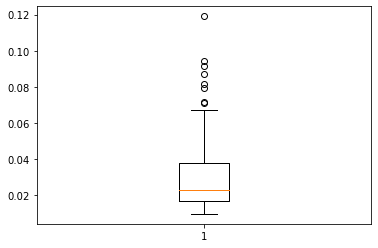

In [136]:
#accessing a boxplot 
plt.boxplot(park_data['MDVP:Shimmer'])

We observe a right skewed distribution. There are quite a number of outliers

In [263]:
#parameters
shim_mean = 0.029709
shim_first_quartile = 0.016505
shim_second_quartile = 0.022970
shim_third_quartile =  0.037885
shim_IQR = shim_third_quartile - shim_first_quartile
shim_upper_inner_fence = shim_third_quartile + (1.5 * shim_IQR)
shim_lower_inner_fence = shim_first_quartile - (1.5 * shim_IQR)
shim_upper_outer_fence = shim_third_quartile + (3 * shim_IQR )
print(shim_upper_inner_fence)
print(shim_lower_inner_fence)
print(shim_upper_outer_fence)

0.069955
-0.015565000000000002
0.102025


In [138]:
#Acessing the number of MDVP:Shimmer below the mean
len(park_data.loc[park_data['MDVP:Shimmer'] < shim_mean])

123

In [139]:
#accessing the number of MDVP:Shimmer below the median
len(park_data.loc[park_data['MDVP:Shimmer'] < shim_second_quartile])

97

In [140]:
#accessing the number of MDVP:Shimmer which are mid-outliers
len(park_data.loc[(park_data['MDVP:Shimmer'] > shim_upper_inner_fence) & (park_data['MDVP:Shimmer'] < shim_upper_outer_fence)])

7

In [141]:
#accessing the dataset of mid-outliers
park_data.loc[(park_data['MDVP:Shimmer'] > shim_upper_inner_fence) & (park_data['MDVP:Shimmer'] < shim_upper_outer_fence)]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
91,phon_R01_S22_1,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.07959,...,0.13262,0.01658,19.664,1,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
148,phon_R01_S35_3,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [142]:
#accessing the number of MDVP:Shimmer which are extreme outliers
len(park_data.loc[park_data['MDVP:Shimmer'] > shim_upper_outer_fence])

1

In [143]:
#accessing the dataset of MDVP:Shimmer extreme outliers
(park_data.loc[park_data['MDVP:Shimmer'] > shim_upper_outer_fence])

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.018,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.76832,-2.434031,0.450493,3.079221,0.527367


123 thus(63.07%) of the dataset have recorgings below the mean on MDVP:Shimmer. Again, 97(thus 49.74%) of data are below the median. We observe 8 outliers of which  7 are mid-outliers and 1 extreme outliers. We see patient (phon_R01_S35) having 5 outliers of the 8 outliers. 
All outliers have a status of 1 to the disease

#### Shimmer:DDA

In [144]:
#accessing the statistical info
park_data['Shimmer:DDA'].describe()

count    195.000000
mean       0.046993
std        0.030459
min        0.013640
25%        0.024735
50%        0.038360
75%        0.060795
max        0.169420
Name: Shimmer:DDA, dtype: float64

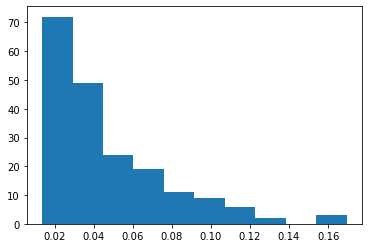

In [145]:
#plotting a histogram
plt.hist(park_data['Shimmer:DDA'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36d677550>,
 'caps': [<matplotlib.lines.Line2D at 0xb36d677c70>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36d6771c0>],
 'medians': [<matplotlib.lines.Line2D at 0xb36d6843d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36d684760>],
 'means': []}

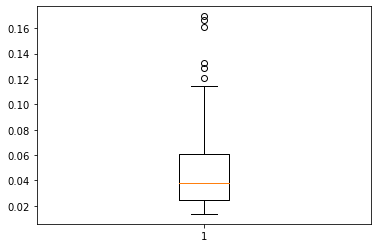

In [146]:
#plotting a boxplot
plt.boxplot(park_data['Shimmer:DDA'])

The two distributions above show a right skewed data of Shimmer:DDA. We can observe outliers in the boxplot. We will analyze the distribution further.

In [147]:
#parameters
DDA_mean =  0.046993
DDA_first_quartile = 0.024735
DDA_second_quartile = 0.038360
DDA_third_quartile = 0.060795
DDA_IQR = DDA_third_quartile - DDA_first_quartile
DDA_upper_inner_fence = DDA_third_quartile + (1.5 * DDA_IQR)
DDA_lower_inner_fence = DDA_first_quartile - (1.5 * DDA_IQR)
DDA_upper_outer_fence = DDA_third_quartile + (3 * DDA_IQR)
print(DDA_lower_inner_fence)
print(DDA_upper_inner_fence)
print(DDA_upper_outer_fence)

-0.029355
0.114885
0.168975


In [148]:
#accessing the number of DDA below the mean
len(park_data.loc[park_data['Shimmer:DDA'] < DDA_mean])

124

In [149]:
#accessing the number of DDA below the median
len(park_data.loc[park_data['Shimmer:DDA'] < DDA_second_quartile])

97

In [150]:
#accessing the number of DDA which are mid-outliers(beyond the upper_inner_fence only) 
#thus,at the max point on the whiskers
len(park_data.loc[(park_data['Shimmer:DDA'] > DDA_upper_inner_fence) & (park_data['Shimmer:DDA'] < DDA_upper_outer_fence)])

5

In [151]:
#accessing the dataset with outliers beyond the upper fence only(mid-outliers)
park_data.loc[(park_data['Shimmer:DDA'] > DDA_upper_inner_fence) & (park_data['Shimmer:DDA'] < DDA_upper_outer_fence)]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
91,phon_R01_S22_1,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.07959,...,0.13262,0.01658,19.664,1,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
141,phon_R01_S34_2,208.083,253.792,91.802,0.00757,0.00004,0.00428,0.00428,0.01285,0.06725,...,0.12047,0.04238,15.648,1,0.606344,0.665945,-5.410336,0.288917,2.665133,0.231723
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [152]:
#accessing the number of DDA which have extreme outliers
len(park_data.loc[park_data['Shimmer:DDA'] > DDA_upper_outer_fence])

1

In [153]:
#accessing the dataset with the outer fence
park_data.loc[park_data['Shimmer:DDA'] > DDA_upper_outer_fence]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.018,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.76832,-2.434031,0.450493,3.079221,0.527367


From further analysis, there are 6 recordings which are outliers and have a status of 1.There is 1 extreme outlier and 5 inner outliers. 124 recordings thus 63.58% are below the mean with 49.74% of data below the median.

#### RPDE

In [154]:
#accessing the statistical info of RPDE(nonlinear measure)
park_data['RPDE'].describe()

count    195.000000
mean       0.498536
std        0.103942
min        0.256570
25%        0.421306
50%        0.495954
75%        0.587562
max        0.685151
Name: RPDE, dtype: float64

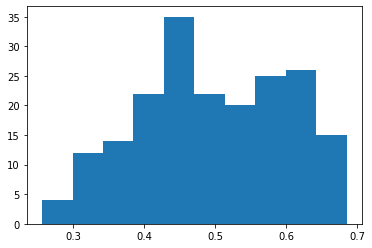

In [155]:
#plotting a histogram for RPDE
plt.hist(park_data['RPDE'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36d75e8e0>,
 'caps': [<matplotlib.lines.Line2D at 0xb36d76d040>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36d75e550>],
 'medians': [<matplotlib.lines.Line2D at 0xb36d76d760>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36d76daf0>],
 'means': []}

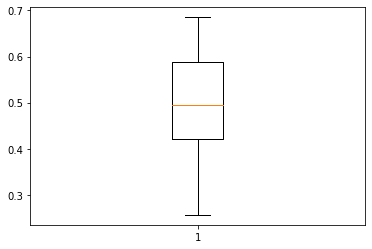

In [156]:
#plotting a boxplot for RPDE
plt.boxplot(park_data['RPDE'])

from the histogram and boxplot,it can be observed that the distribution approaches a normal and 50% or less recorded most of the data. 

In [157]:
#useful parameters
RPDE_mean = 0.498536
RPDE_first_quartile = 0.421306
RPDE_second_quartile = 0.495954
RPDE_third_quartile = 0.587562
RPDE_IQR = RPDE_third_quartile - RPDE_first_quartile
RPDE_upper_inner_fence = RPDE_third_quartile + (1.5 *RPDE_IQR) # upper outlier range
RPDE_lower_inner_fence = RPDE_first_quartile - (1.5* RPDE_IQR) #lower outlier range
print(RPDE_upper_inner_fence)
print(RPDE_lower_inner_fence)


0.8369460000000001
0.171922


In [158]:
#accessing the number of RPDE below the mean
len(park_data.loc[park_data['RPDE'] < RPDE_mean])

101

In [159]:
#accessing the number of RPDE below the median
len(park_data.loc[park_data['RPDE'] < RPDE_second_quartile])

97

In [160]:
#accessing the number of RPDE which have outliers
len(park_data.loc[park_data['RPDE'] > RPDE_upper_inner_fence])

0

It is observed that 49.74% of the distribution makes up data below the median. Again, 101 recordings made 51.79% of the dataset that are below the mean. there were no outliers.

#### PPE

In [161]:
#drawing out the statistical data of the data
park_data['PPE'].describe()

count    195.000000
mean       0.206552
std        0.090119
min        0.044539
25%        0.137451
50%        0.194052
75%        0.252980
max        0.527367
Name: PPE, dtype: float64

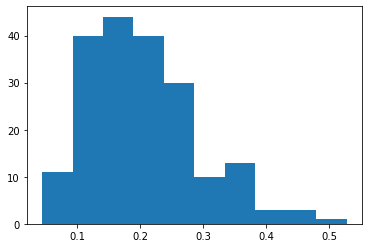

In [162]:
#plotting a histogram
plt.hist(park_data['PPE'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36d7ca760>,
 'caps': [<matplotlib.lines.Line2D at 0xb36d7caf10>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36d7a2a00>],
 'medians': [<matplotlib.lines.Line2D at 0xb36d7e7580>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36d7e70a0>],
 'means': []}

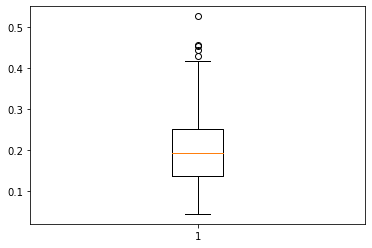

In [163]:
#plotting a boxplot
plt.boxplot(park_data['PPE'])

From the histogram and boxplot we can observe a right skewed distribution. we can also observe outliers

In [164]:
#parameters
pp_first_quartile = 0.137451
pp_second_quartile = 0.194052
pp_third_quartile = 0.252980
pp_mean = 0.206552
pp_IQR = pp_third_quartile - pp_first_quartile
pp_lower_inner_fence = pp_first_quartile -(1.5 * pp_IQR) #lower outlier range
pp_upper_inner_fence = pp_third_quartile + (1.5 *pp_IQR)  #upper outlier range
print(pp_lower_inner_fence)
print(pp_upper_inner_fence)

-0.0358425
0.42627349999999997


In [165]:
#accessing the number of PPE below the mean
len(park_data.loc[park_data['PPE'] < pp_mean])

104

In [166]:
#accessing the number of ppe below the median
len(park_data.loc[park_data['PPE'] < pp_second_quartile])

97

In [167]:
#accessing the number of ppe which are outliers
len(park_data.loc[park_data['PPE'] > pp_upper_inner_fence])

5

In [168]:
#drawing out the dataset of ppe which are outliers
park_data.loc[park_data['PPE'] > pp_upper_inner_fence]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
17,phon_R01_S04_6,168.778,232.181,75.603,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,...,0.04322,0.02919,20.376,1,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


It is observed that the median 0.194052 which makes 50% or less of the distribution have a low frequency and 2.56% outliers.
we can see the status of the outliers are positive. Three of the recordings were from a single patient

#### DFA

In [169]:
#accessing the stats info of signal fractal scaling exponent
park_data['DFA'].describe()

count    195.000000
mean       0.718099
std        0.055336
min        0.574282
25%        0.674758
50%        0.722254
75%        0.761881
max        0.825288
Name: DFA, dtype: float64

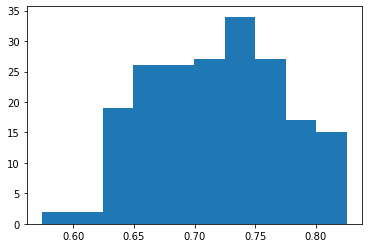

In [170]:
#plotting the histogram for DFA
plt.hist(park_data['DFA'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36d52a8e0>,
 'caps': [<matplotlib.lines.Line2D at 0xb36d525ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36d52acd0>],
 'medians': [<matplotlib.lines.Line2D at 0xb36d5254f0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36d525d90>],
 'means': []}

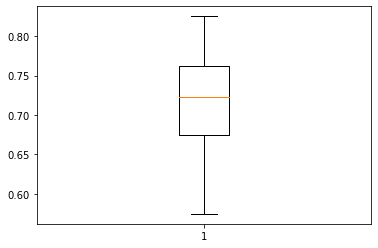

In [171]:
#plotting a boxplot for DFA
plt.boxplot(park_data['DFA'])

From both histogram and boxplot, we can observe a left skewed distribution. we will use the boxplot distribution to draw out further analysis

In [172]:
#useful parameters
DFA_mean = 0.718099
DFA_first_quartile = 0.674758
DFA_second_quartile = 0.722254
DFA_third_quartile = 0.761881
DFA_IQR = DFA_third_quartile - DFA_first_quartile
DFA_lower_inner_fence = DFA_first_quartile - (1.5 * DFA_IQR)
DFA_upper_inner_fence = DFA_third_quartile + (1.5 * DFA_IQR)
print(DFA_lower_inner_fence)
print(DFA_upper_inner_fence)

0.5440734999999999
0.8925655000000001


In [173]:
#accessing the number of DFA below the mean
len(park_data.loc[park_data['DFA'] < DFA_mean])

89

In [174]:
#accessing the number of DFA below the median
len(park_data.loc[park_data['DFA'] < DFA_second_quartile])

97

In [175]:
#accessing the number of DFA which are outliers
len(park_data.loc[park_data['DFA'] > DFA_upper_inner_fence])

0

From the distribution ,majority of data was recorded at 50% or less. 89 recordings thus 45.64% are below the mean. also, 97 of recordiongs makes 49.74% of the distribution

#### spread1

In [176]:
park_data['spread1'].describe() 

count    195.000000
mean      -5.684397
std        1.090208
min       -7.964984
25%       -6.450096
50%       -5.720868
75%       -5.046192
max       -2.434031
Name: spread1, dtype: float64

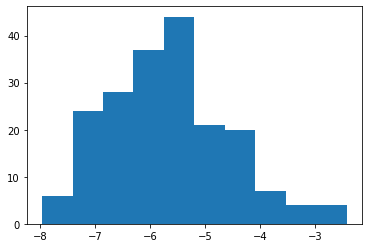

In [177]:
plt.hist(park_data['spread1'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36c19fbb0>,
 'caps': [<matplotlib.lines.Line2D at 0xb36c236190>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36bf5b310>],
 'medians': [<matplotlib.lines.Line2D at 0xb36c2360d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36be320d0>],
 'means': []}

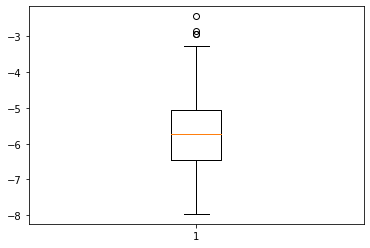

In [178]:
plt.boxplot(park_data['spread1'])

From the histogram and boxplot we can observe the distribution approaches a normal. We will analyze that. we also can see some outliers

In [179]:
#parameters
ff_first_quartile = -6.450096
ff_second_quartile = -5.720868
ff_third_quartile = -5.046192
ff_mean = -5.684397
ff_IQR = ff_third_quartile - ff_first_quartile
ff_lower_inner_fence = ff_first_quartile -(1.5 * ff_IQR) #lower outlier range
ff_upper_inner_fence = ff_third_quartile + (1.5 *ff_IQR)  #upper outlier range
print(ff_lower_inner_fence)
print(ff_upper_inner_fence)

-8.555952000000001
-2.9403359999999985


In [180]:
#Accessing the number of fundamental frequency below the mean
len(park_data.loc[park_data['spread1'] < ff_mean])

100

In [181]:
#Accessing the number of fundamental frequency below the median
len(park_data.loc[park_data['spread1'] < ff_second_quartile])

97

In [182]:
#Accessing the number of fundamental frequency which are outliers
len(park_data.loc[park_data['spread1'] > ff_upper_inner_fence])

4

In [183]:
#Accessing the dataset which are outliers
park_data.loc[park_data['spread1'] > ff_upper_inner_fence]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
17,phon_R01_S04_6,168.778,232.181,75.603,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,...,0.04322,0.02919,20.376,1,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
164,phon_R01_S39_6,102.273,142.830,85.902,0.00907,0.00009,0.00493,0.00461,0.01480,0.02814,...,0.04736,0.03882,18.447,1,0.671378,0.674562,-2.929379,0.396746,2.560422,0.367233


We see the status of the outliers are positive with 2 recordings from from patient. We can also observe 100 recordings make a 51.28% of fundamental frequency. and they appraoch an even distribution. and a 2.05% of the data that went beyond the frequency were tested positive. 

All coloumns have a percentage of 49.74 of data below their median.
We will then find out the factors and conditions for testing positive further, from the observations we have highlighted 

#### spread2

In [184]:
#accessing statistical data
park_data['spread2'].describe()

count    195.000000
mean       0.226510
std        0.083406
min        0.006274
25%        0.174351
50%        0.218885
75%        0.279234
max        0.450493
Name: spread2, dtype: float64

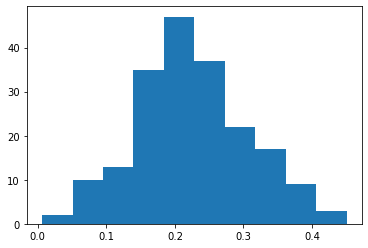

In [185]:
#plotting histogram
plt.hist(park_data['spread2'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xb36d4f11f0>,
 'caps': [<matplotlib.lines.Line2D at 0xb36d4f1910>,
 'boxes': [<matplotlib.lines.Line2D at 0xb36d4fae20>],
 'medians': [<matplotlib.lines.Line2D at 0xb36d4d1070>],
 'fliers': [<matplotlib.lines.Line2D at 0xb36d4d1400>],
 'means': []}

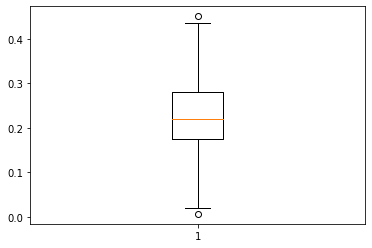

In [186]:
#plotting boxplot
plt.boxplot(park_data['spread2'])

From the the histogram and boxplot, we can observe a normal distribution. we can also observe outliers on both ends of the boxplot

In [187]:
#useful parameters
sp2_first_quartile = 0.174351
sp2_second_quartile = 0.218885
sp2_third_quartile = 0.279234
sp2_mean = 0.226510
sp2_IQR = sp2_third_quartile -sp2_first_quartile
sp2_upper_inner_fence = sp2_third_quartile + (1.5 * sp2_IQR) #upper outlier range
sp2_lower_inner_fence = sp2_first_quartile - (1.5 * sp2_IQR) #lower outlier range
print(sp2_upper_inner_fence)
print(sp2_lower_inner_fence)

0.43655849999999996
0.017026500000000028


In [188]:
#accessing the number of frequnecy variation below the mean
len(park_data.loc[park_data['spread2'] < sp2_mean])

105

In [189]:
#accessing the number of frequency variation below the median
len(park_data.loc[park_data['spread2'] < sp2_second_quartile])

97

In [190]:
#Accessing the number of frequency variation which are upper outliers
len(park_data.loc[park_data['spread2'] > sp2_upper_inner_fence])

1

In [191]:
#accessing the dataframe with a upper outlier
park_data.loc[park_data['spread2'] > sp2_upper_inner_fence]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.018,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.76832,-2.434031,0.450493,3.079221,0.527367


In [192]:
#Accessing the number of frequency variation with a lower outlier
len(park_data.loc[park_data['spread2'] < sp2_lower_inner_fence])

1

In [193]:
#accessing the dataframe with the lower outlier
park_data.loc[park_data['spread2'] < sp2_lower_inner_fence]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
65,phon_R01_S17_6,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.0014,0.00408,0.01745,...,0.02827,0.0042,24.547,0,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546


From the distribution, We see the status of the lower outliers are positive with 2 recordings from from patient. We can also observe 100 recordings make a 51.28% of fundamental frequency. and they appraoch an even distribution. and a 2.05% of the data that went beyond the frequency were tested positive.

### MULTIVARIATE ANALYSIS

 Analyzing the Relationship between the maximum & minimum vocal frequency

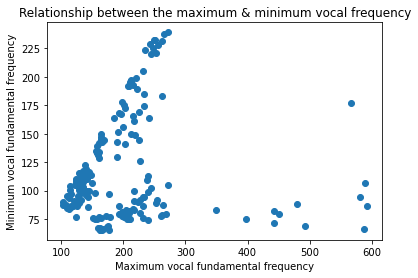

In [194]:
plt.scatter([park_data['MDVP:Fhi(Hz)']],[park_data['MDVP:Flo(Hz)']])
plt.xlabel('Maximum vocal fundamental frequency')
plt.ylabel('Minimum vocal fundamental frequency')
plt.title('Relationship between the maximum & minimum vocal frequency')
plt.show()

We can observe majority of vocal frequency gather within 100 to 290 at the maximum vocal axis and lie betwwen 75 to 125 at the minimum focal axis. Again , the highest point of relationship at y axis which increases as the x axis increases somewhere about 280 at the maximum vocal and 250 at the minimum vocal. oultiers present  go against the the pattern of the distribution
The distribution appears to be a weak positive correlation 

#### Relationship between the average & maximum vocal frequency

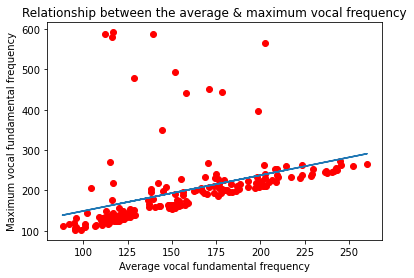

In [195]:
r = park_data['MDVP:Fo(Hz)']
d = park_data['MDVP:Fhi(Hz)']
a, b = np.polyfit(r, d, 1)
plt.scatter(r, d, c = 'red')
plt.plot(r, a *r + b)
plt.xlabel('Average vocal fundamental frequency')
plt.ylabel('Maximum vocal fundamental frequency')
plt.title('Relationship between the average & maximum vocal frequency')
plt.show()

The scatterplot shows a strong positive correlation . As the average vocal frequency inscrease, so does the maximum vocal frequency. Between points 50 t0 250 at the maximum frequency  and the average frequnecy increases the distribution is strongly related. points above 250 at the maximum frequency conote abnormal distribution as they are widely spread outside the normal distribution.these are the Outliers

Relationship between the average & minimum vocal frequency

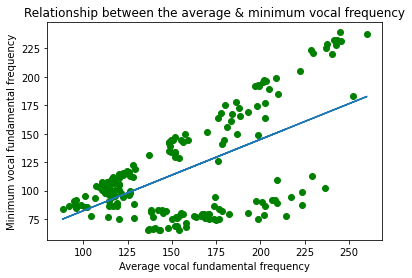

In [196]:
w = park_data['MDVP:Fo(Hz)']
o = park_data['MDVP:Flo(Hz)']
a, b = np.polyfit(w, o, 1)
plt.scatter(w, o, c = 'green')
plt.plot(w, a *w + b)
plt.xlabel('Average vocal fundamental frequency')
plt.ylabel('Minimum vocal fundamental frequency')
plt.title('Relationship between the average & minimum vocal frequency')
plt.show()

The scatterplot shows a strong positive correlation. Again the minimum vocal frequency increases as the average vocal frequancy increases. Below the line of best fit shows a weaker relationship of the distribution.
We can then say there is a large number of minimum vocal frequencies that have a strong correlation against the average vocal fundamental frequency as suppose to the relationship of the maximum frequency against the average vocal frequency

### Relationship between the average vocal frequency and the measures of variation of the frequency

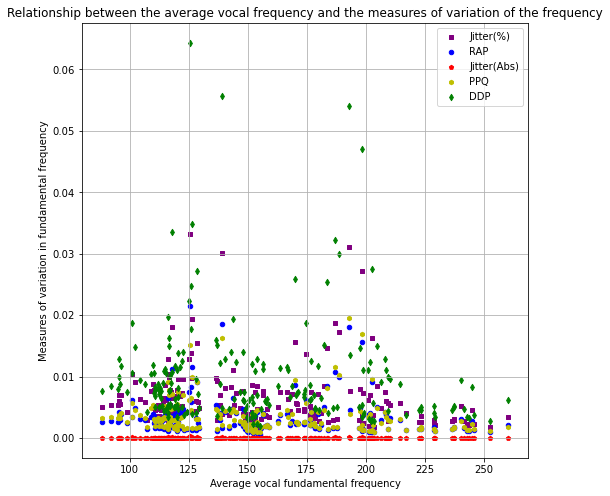

In [198]:
j = park_data['MDVP:Jitter(%)']
t = park_data['MDVP:Jitter(Abs)']
R = park_data['MDVP:RAP']
k = park_data['MDVP:PPQ']
M= park_data['Jitter:DDP']
w = park_data['MDVP:Fo(Hz)']
fig= plt.figure(figsize= (8,8))
ax1 = fig.add_subplot(111)
ax1.scatter(w,j ,c = 'purple', s = 20,marker = 's', label = 'Jitter(%)')
ax1.scatter(w,R,c= 'blue',s=20,marker = 'o', label = 'RAP')
ax1.scatter(w,t,c = 'red', s= 20,marker= 'p',label = 'Jitter(Abs)')
ax1.scatter(w,k, c= 'y',s =20,marker = 'h',label= 'PPQ')
ax1.scatter(w,M, c = 'green', s=20,marker = 'd',label = 'DDP')

plt.xlabel('Average vocal fundamental frequency')
plt.ylabel('Measures of variation in fundamental frequency')
plt.title('Relationship between the average vocal frequency and the measures of variation of the frequency')
plt.legend()

plt.grid()
plt.show()

From the graph, we can observe values of DDP which are distant from most of the data on top. in this data distribution, points are randomly distributed.therefore, we can say the data points have no correlation or significant small correlation.

We also see jitter(abs),variation of the vocal frequency, having the lowest frequency recordings. Again, DDP and jitter(%)  vocal variations have the highest frequency 

#### Relationship between measures of variation in amplitude against ratio of noise to tonal components in the voice

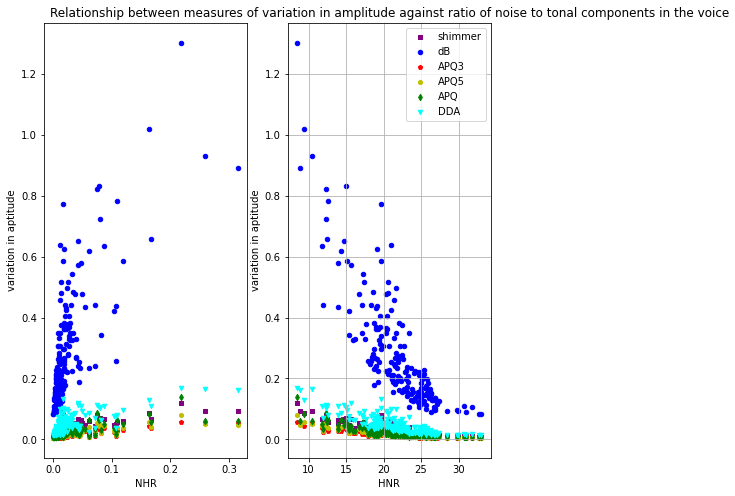

In [199]:
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA  - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
sh = park_data['MDVP:Shimmer']
dB = park_data['MDVP:Shimmer(dB)']
AQ3 = park_data['Shimmer:APQ3']
AQ5 = park_data['Shimmer:APQ5']
AQ= park_data['MDVP:APQ']
DDA = park_data['Shimmer:DDA']
nh = park_data['NHR']
hn = park_data['HNR']
fig= plt.figure(figsize= (8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(nh,sh ,c = 'purple', s = 20,marker = 's', label = 'shimmer')
ax1.scatter(nh,dB,c= 'blue',s=20,marker = 'o', label = 'dB')
ax1.scatter(nh,AQ3,c = 'red', s= 20,marker= 'p',label = 'APQ3')
ax1.scatter(nh,AQ5, c= 'y',s =20,marker = 'h',label= 'APQ5')
ax1.scatter(nh,AQ, c = 'green', s=20,marker = 'd',label = 'APQ')
ax1.scatter(nh,DDA, c = 'cyan',s = 20, marker = 'v', label = 'DDA')

ax2.scatter(hn,sh ,c = 'purple', s = 20,marker = 's', label = 'shimmer')
ax2.scatter(hn,dB,c= 'blue',s=20,marker = 'o', label = 'dB')
ax2.scatter(hn,AQ3,c = 'red', s= 20,marker= 'p',label = 'APQ3')
ax2.scatter(hn,AQ5, c= 'y',s =20,marker = 'h',label= 'APQ5')
ax2.scatter(hn,AQ, c = 'green', s=20,marker = 'd',label = 'APQ')
ax2.scatter(hn,DDA, c = 'cyan',s = 20, marker = 'v', label = 'DDA')
ax1.set_xlabel('NHR')
ax1.set_ylabel('variation in aptitude')
ax2.set_xlabel('HNR')
ax2.set_ylabel('variation in aptitude')
plt.ylabel('variation in aptitude')
plt.title('Relationship between measures of variation in amplitude against ratio of noise to tonal components in the voice')
plt.legend()
plt.grid()
plt.show()


From both graphs, shimmer(dB) have high aptitudes against the tonal components in the recordings. Again, in the first graph, there is barely a correlation in the distribution unlike the second , which has a weak negative correlation of which is the shimmer(dB). that means, the jitter aptitudes in the recordings have a relationship with the tonal/noise components in the recording 

#### Signal fractal scaling exponent vs nonlinear dynamical complexity measures

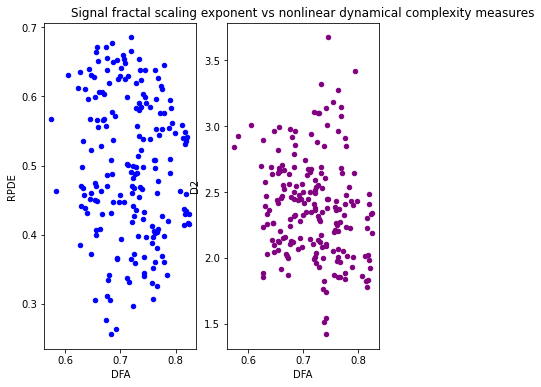

In [200]:
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(park_data['DFA'], park_data['RPDE'], s = 20, c = 'blue')

ax2.scatter(park_data['DFA'], park_data['D2'], s= 20, c = 'purple')
ax1.set_xlabel('DFA')
ax1.set_ylabel('RPDE')
ax2.set_xlabel('DFA')
ax2.set_ylabel('D2')
plt.title('Signal fractal scaling exponent vs nonlinear dynamical complexity measures')
plt.show()

From the graph, we can observe there is no correlation in the distributions of DFA(signal scaling exponetent) against RPDE(dynamic complexity measure) and D2

#### Relationship between Nonlinear Recurrence and Fractal Scaling  for Voice Disorder Detection'

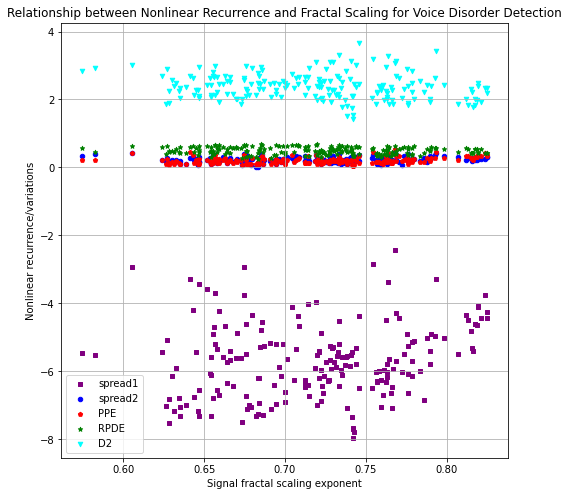

In [201]:
sp1=park_data['spread1']
sp2=park_data['spread2']
pe= park_data['PPE']
dfa= park_data['DFA']
RP= park_data['RPDE']
d2= park_data['D2'] 

fig= plt.figure(figsize= (8,8))
ax1 = fig.add_subplot(111)
ax1.scatter(dfa,sp1 ,c = 'purple', s = 20,marker = 's', label = 'spread1')
ax1.scatter(dfa,sp2,c= 'blue',s=20,marker = 'o', label = 'spread2')
ax1.scatter(dfa,pe,c = 'red', s= 20,marker= 'p',label = 'PPE')
ax1.scatter(dfa,RP, c = 'green', s=20,marker = '*',label = 'RPDE')
ax1.scatter(dfa,d2, c = 'cyan', s=20,marker = 'v',label = 'D2')

plt.xlabel('Signal fractal scaling exponent')
plt.ylabel('Nonlinear recurrence/variations')
plt.title('Relationship between Nonlinear Recurrence and Fractal Scaling for Voice Disorder Detection')
plt.legend()

plt.grid()
plt.show()

From the graph, the distribution shows the scale signals of the recordings aand at which variation recurring points they appear. We can observe at which points of variations spread1 occur thus between -2 and -8 and D2 between 2 and 4. However,the points where we observe variation acitivity between the signal exponents are between 0 and 1 which exists among RPDE,spread2 and PPE.

### OBSERVATIONS

The data distribution shows a 1 status of 147 ; 6 voice recordings each involving 24 individuals.Instead of the 6 audio from each individual,3 individuals thus(phon_R01_S35,phon_R01_S21,phon_R01_S27) had 7 recordings made.

We also obeserved through the distributions that 97 recordings ,which makes 49.74% of the total number of recordings was less than the median.Thus, relatively half of the data fell below the median. Most of the data had a 97 recording at the 50% percentile only Jitters% which had 96 recordings at its 50% percentile. 

Again,we observe outliers in the data.especially with the measures of variation in fundamental frequency. the recordings that recurred as most outliers are (phon_R01_S35 and phon_R01_S24) and the least outlier being phon_R01_S17.

In the relationship between the high and low focal frequency, we observe a weak correlation with them. the maximumfrequency increases as the minimumin increases and vise versa. Again, we observe a strong positive correlation between the average freqency and the maximum and minimum frequency.

The data showed a frequency distribution between the average frequency and the measures of variation of the frequency. We see jitter(abs),variation of the vocal frequency, having the lowest frequency recordings. Again, DDP and jitter(%) vocal variations have the highest frequency. There is alot of variation in the frequency between 0.0 to 0.01 as the average fundamental frequency consist of these variation measures. 

With the relationship between measures of variation in amplitude against ratio of noise to tonal components in the voice(NHR and HNR), we observe shimmer(dB) having high aptitudes against the tonal components in the recordings. We barely see a correlation in shimmer(db) aptitude variation against the NHR as whilst other variations slightly increase as the tonal component increase. Whereas against the HNR, there is weak negative correlation of which is the shimmer(dB). Thus the jitter aptitudes in the recordings have a relationship with the tonal/noise components in the recording.

In the case of the relationship between nonlinear recurrence and fractal scaling for voice disorder detection, we observe the points were most variations occured were they were close. The points where we observe variation acitivity between the signal exponents are between 0 and 1 which exists amongst RPDE,spread2 and PPE

Finally it has been highlighted the factors that strongly influenced or identifies the status of a patient which are based on the frequency of the voice are maximum vocal frequency(MDVP:Fhi(Hz)),average minimum vocal frequency(MDVP:Fo(Hz)), minimum vocal frequency(MDVP:Fhi(Hz)) , ratio of tonal compoent in the voice(NHR) and the measure of the fundamental frequency(PPE).


### Treating outliers 

In [366]:
#Replacing whatever is above the upper limits with the upper limits value and replacing whatever is below the lower limits with the lower limit value
NHR_cln = np.where(park_data['NHR'] > NHR_upper_inner_fence,NHR_upper_inner_fence,
                             np.where(park_data['NHR'] < NHR_lower_inner_fence, NHR_lower_inner_fence, park_data['NHR']))



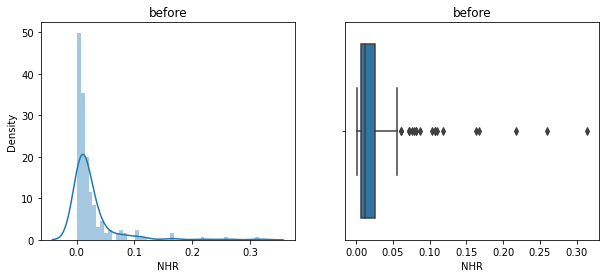

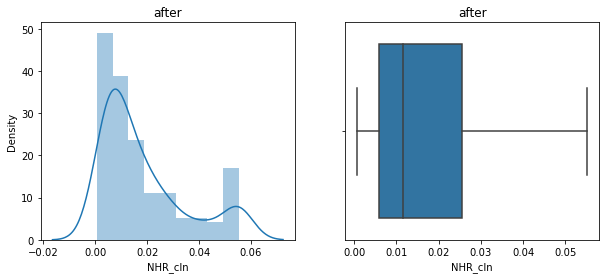

In [243]:
#Comparing the orginal column against the treated column to check the distribution and verify outier treatment
    plt.figure(figsize=(10,4))
    #histogram
    plt.subplot(1,2,1)
    sns.distplot(park_data['NHR'])
    plt.title('before')
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(park_data['NHR'])
    plt.title('before')
    plt.show()
    
  
plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.distplot(NHR_cln)
    plt.xlabel('NHR_cln')
    plt.title('after')
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(NHR_cln)
    plt.xlabel('NHR_cln')
    plt.title('after')
    plt.show()

We can observe outliers have been capped in the distribution. It also can be seen no changes to the data distribution has been made after outlier treatment is is vital to the data analysis. We will therefore treat other columns having outliers

In [368]:
#Making a copy of the original dataset and reassigning the column names to their respective treated columns
park_data2 = park_data.copy()

In [415]:
park_data2['HNR'] = np.where(park_data['HNR'] > HNR_upper_fence,HNR_upper_fence,
                             np.where(park_data['HNR'] < HNR_lower_fence, HNR_lower_fence, park_data['HNR']))

park_data2['MDVP:Fhi(Hz)'] =np.where(park_data['MDVP:Fhi(Hz)'] > fhi_upper_inner_fence,fhi_upper_inner_fence,
                             np.where(park_data['MDVP:Fhi(Hz)'] < fhi_lower_inner_fence, fhi_lower_inner_fence, park_data['MDVP:Fhi(Hz)']))

park_data2['MDVP:Flo(Hz)'] =np.where(park_data['MDVP:Flo(Hz)'] > flo_upper_inner_fence,flo_upper_inner_fence,
                             np.where(park_data['MDVP:Flo(Hz)'] < flo_lower_inner_fence, flo_lower_inner_fence, park_data['MDVP:Flo(Hz)']))

park_data2['D2'] =np.where(park_data['D2'] > d2_upper_inner_fence,d2_upper_inner_fence,
                    np.where(park_data['D2'] < d2_lower_inner_fence, d2_lower_inner_fence, park_data['D2']))

park_data2['MDVP:APQ'] =np.where(park_data['MDVP:APQ'] > APQ_upper_inner_fence,APQ_upper_inner_fence,
                             np.where(park_data['MDVP:APQ'] < APQ_lower_inner_fence, APQ_lower_inner_fence, park_data['MDVP:APQ']))

park_data2['Jitter:DDP'] =np.where(park_data['Jitter:DDP'] > DDP_upper_inner_fence,DDP_upper_inner_fence,
                             np.where(park_data['Jitter:DDP'] < DDP_lower_inner_fence, DDP_lower_inner_fence, park_data['Jitter:DDP']))

park_data2['MDVP:PPQ'] =np.where(park_data['MDVP:PPQ'] > PPQ_outlier,PPQ_outlier,
                             np.where(park_data['MDVP:PPQ'] < PPQ_lower_inner_fence, PPQ_lower_inner_fence, park_data['MDVP:PPQ']))

park_data2['MDVP:RAP'] =np.where(park_data['MDVP:RAP'] > RAP_outlier,RAP_outlier,
                             np.where(park_data['MDVP:RAP'] < RAP_lower_inner_fence, RAP_lower_inner_fence, park_data['MDVP:RAP']))

park_data2['MDVP:Jitter(Abs)'] =np.where(park_data['MDVP:Jitter(Abs)'] > Abs_outlier,Abs_outlier,
                                 np.where(park_data['MDVP:Jitter(Abs)'] < Abs_lower_outlier, Abs_lower_outlier, park_data['MDVP:Jitter(Abs)']))

park_data2['MDVP:Jitter(%)'] =np.where(park_data['MDVP:Jitter(%)'] > Jit_outlier,Jit_outlier,
                             np.where(park_data['MDVP:Jitter(%)'] < Jit_lower_outlier, Jit_lower_outlier, park_data['MDVP:Jitter(%)']))

park_data2['Shimmer:APQ5'] =np.where(park_data['Shimmer:APQ5'] > APQ5_upper_inner_fence,APQ5_upper_inner_fence,
                             np.where(park_data['Shimmer:APQ5'] < APQ5_lower_inner_fence, APQ5_lower_inner_fence, park_data['Shimmer:APQ5']))

park_data2['Shimmer:APQ3'] =np.where(park_data['Shimmer:APQ3'] > APQ3_upper_inner_fence,APQ3_upper_inner_fence,
                             np.where(park_data['Shimmer:APQ3'] < APQ3_lower_inner_fence, APQ3_lower_inner_fence, park_data['Shimmer:APQ3']))

park_data2['MDVP:Shimmer(dB)'] =np.where(park_data['MDVP:Shimmer(dB)'] > db_upper_inner_fence,db_upper_inner_fence,
                                 np.where(park_data['MDVP:Shimmer(dB)'] < db_lower_inner_fence, db_lower_inner_fence, park_data['MDVP:Shimmer(dB)']))

park_data2['MDVP:Shimmer'] =np.where(park_data['MDVP:Shimmer'] > shim_upper_inner_fence,shim_upper_inner_fence,
                             np.where(park_data['MDVP:Shimmer'] < shim_lower_inner_fence, shim_lower_inner_fence, park_data['MDVP:Shimmer']))

park_data2['Shimmer:DDA'] =np.where(park_data['Shimmer:DDA'] > DDA_upper_inner_fence,DDA_upper_inner_fence,
                             np.where(park_data['Shimmer:DDA'] < DDA_lower_inner_fence, DDA_lower_inner_fence, park_data['Shimmer:DDA']))

park_data2['PPE'] =np.where(park_data['PPE'] > pp_upper_inner_fence,pp_upper_inner_fence,
                             np.where(park_data['PPE'] < pp_lower_inner_fence, pp_lower_inner_fence, park_data['PPE']))

park_data2['spread1'] =np.where(park_data['spread1'] > ff_upper_inner_fence,ff_upper_inner_fence,
                             np.where(park_data['spread1'] < ff_lower_inner_fence, ff_lower_inner_fence, park_data['spread1']))

park_data2['spread2'] =np.where(park_data['spread2'] > sp2_upper_inner_fence,sp2_upper_inner_fence,
                             np.where(park_data['spread2'] < sp2_lower_inner_fence, sp2_lower_inner_fence, park_data['spread2']))

park_data2['NHR'] = np.where(park_data['NHR'] > NHR_upper_inner_fence,NHR_upper_inner_fence,
                             np.where(park_data['NHR'] < NHR_lower_inner_fence, NHR_lower_inner_fence, park_data['NHR']))



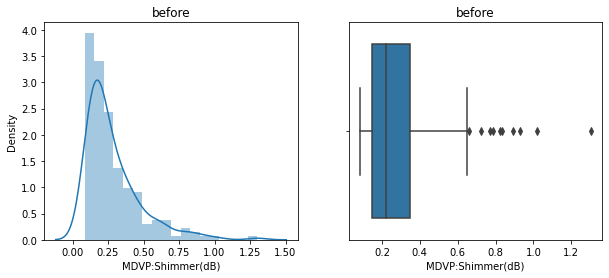

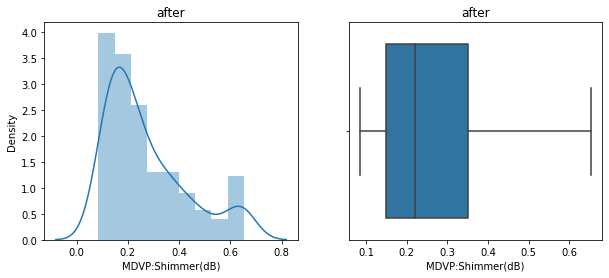

In [433]:
#Investigating a column to check and confirm the distribution of the data and its outlier 
    plt.figure(figsize=(10,4))
    #histogram
    plt.subplot(1,2,1)
    sns.distplot(park_data['MDVP:Shimmer(dB)'])
    plt.title('before')
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(park_data['MDVP:Shimmer(dB)'])
    plt.title('before')
    plt.show()
    
  
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.distplot(park_data2['MDVP:Shimmer(dB)'])
    plt.xlabel('MDVP:Shimmer(dB)')
    plt.title('after')
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(park_data2['MDVP:Shimmer(dB)'])
    plt.xlabel('MDVP:Shimmer(dB)')
    plt.title('after')
    plt.show()

We can confirm all columns have been treated. We will then use this data for machine learning

### MACHINE LEARNING

From the above analysis, we can see a correlation between most of the columns.in other to train a more accurate model we treated columns having noise or outliers and we will use the 'cln'(treated cloumns to train the model)

In [435]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

### Decision Tree Classifier

In [489]:
#seperating the features (X) and y
X = park_data2.drop(['name','status'],axis = 1)
y = park_data2['status']
model = DecisionTreeClassifier() #creating the model

model.fit(X_train, y_train) #training the model

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =0.2) #training and testing the entire dataset of X and y

predictions = model.predict(X_test) #predict the dataset of X

score = accuracy_score(y_test,predictions) #determining the accuracy of the model


In [490]:
score

0.9743589743589743

In [499]:
#checking predictions on status of names: phon_R01_S19_2 and phon_R01_S24_6 respectively
predictions = model.predict([[237.226, 247.326 ,225.227 ,0.00298, 0.000010 ,0.00169 ,0.00182 ,0.00507,0.01752,0.03104, 0.00740 , 22.736,0.305062 , 0.654172 , 7.310550 , 0.098648, 2.416838 , 0.095032, 0.426, 0.02182, 0.03130, 0.02971],[241.404 ,248.834 ,232.483 ,0.00281 ,0.000010 ,0.00157 ,0.00173 ,0.00470 ,0.01760,0.03017, 0.00675, 23.145, 0.457702, 0.634267, 6.793547, 0.158266, 2.256699, 0.117399, 0.626, 0.03134, 0.04518, 0.04368]])

In [500]:
predictions

array([0, 0], dtype=int64)

### Random Forest Tree

In [501]:
#importing libaries
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [503]:
RandomForestClassifier(bootstrap=True,class_weight = None, criterion = 'gini',
                      max_depth=None, max_features='auto',max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

RandomForestClassifier(n_jobs=1)

In [512]:
X= park_data2.drop(['name','status'],axis = 1)
y = park_data2['status']

clf = RandomForestClassifier(n_estimators=100)

#training the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2) #70% for training, 30% test#split dataset into training
#create a gaussian Classifier
 
y_pred=clf.predict(X_test)

#model accuracy
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [513]:
#predict the status of audio names:phon_R01_S19_2 and phon_R01_S24_6 respectively
clf.predict([[237.226, 247.326 ,225.227 ,0.00298, 0.000010 ,0.00169 ,0.00182 ,0.00507,0.01752,0.03104, 0.00740 , 22.736,0.305062 , 0.654172 , 7.310550 , 0.098648, 2.416838 , 0.095032, 0.426, 0.02182, 0.03130, 0.02971],[241.404 ,248.834 ,232.483 ,0.00281 ,0.000010 ,0.00157 ,0.00173 ,0.00470 ,0.01760,0.03017, 0.00675, 23.145, 0.457702, 0.634267, 6.793547, 0.158266, 2.256699, 0.117399, 0.626, 0.03134, 0.04518, 0.04368]])

array([0, 0], dtype=int64)